# TWEET SENTIMENT ANALYSIS

### Importing Libraries

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Reading csv

In [97]:
Final_df=pd.read_csv("tweets-engagement-metrics.csv")

In [98]:
Final_df.head()

,Unnamed: 0,UserID,Gender,LocationID,City,State,StateCode,Country,TweetID,Hour,Day,Weekday,IsReshare,Reach,RetweetCount,Likes,Klout,Sentiment,Lang,text
0,0,tw-1267804344,Unknown,1,Elbasan,Elbasan,AL,Albania,tw-698155297102295041,7,12,Friday,True,339,127,0,44,0.0,en,"""RT @AdrianRusso82: Our Innovation Lab is offi..."
1,1,tw-4762500137,Female,10,Luanda,Luanda,AO,Angola,tw-690506796876824576,5,22,Friday,True,63,26,0,16,-2.0,en,RT @imoyse: Microsoft slashes Azure prices up ...
2,2,tw-4762500137,Female,10,Luanda,Luanda,AO,Angola,tw-698315842434555904,18,12,Friday,True,107,25,0,31,-2.0,en,RT @imoyse: House of clouds: Netflix abandons ...
3,3,tw-928769635,Female,13,NaN,NaN,NaN,Argentina,tw-685663098636791808,20,8,Friday,False,976,0,0,40,3.0,en,@JazzyBieberNews So beautiful!! Aws @justinbie...
4,4,tw-457193677,Unknown,13,NaN,NaN,NaN,Argentina,tw-703293482832683008,12,26,Friday,False,6444,1,0,55,0.0,es,@justinxfaso aws mil gracias eu


In [99]:
Final_df=Final_df.drop('Unnamed: 0',axis=1)
Final_df

,UserID,Gender,LocationID,City,State,StateCode,Country,TweetID,Hour,Day,Weekday,IsReshare,Reach,RetweetCount,Likes,Klout,Sentiment,Lang,text
0,tw-1267804344,Unknown,1,Elbasan,Elbasan,AL,Albania,tw-698155297102295041,7,12,Friday,True,339,127,0,44,0.0,en,"""RT @AdrianRusso82: Our Innovation Lab is offi..."
1,tw-4762500137,Female,10,Luanda,Luanda,AO,Angola,tw-690506796876824576,5,22,Friday,True,63,26,0,16,-2.0,en,RT @imoyse: Microsoft slashes Azure prices up ...
2,tw-4762500137,Female,10,Luanda,Luanda,AO,Angola,tw-698315842434555904,18,12,Friday,True,107,25,0,31,-2.0,en,RT @imoyse: House of clouds: Netflix abandons ...
3,tw-928769635,Female,13,NaN,NaN,NaN,Argentina,tw-685663098636791808,20,8,Friday,False,976,0,0,40,3.0,en,@JazzyBieberNews So beautiful!! Aws @justinbie...
4,tw-457193677,Unknown,13,NaN,NaN,NaN,Argentina,tw-703293482832683008,12,26,Friday,False,6444,1,0,55,0.0,es,@justinxfaso aws mil gracias eu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102057,tw-75190953,Male,6279,Ho Chi Minh City,Ho Chi Minh City,VN,Vietnam,tw-697563129488805888,16,10,Wednesday,False,111,0,0,28,1.0,en,Google has quietly launched its answer to AWS ...
102058,tw-594926522,Male,6283,Lusaka,Lusaka,ZM,Zambia,tw-684750918462652416,7,6,Wednesday,True,331,1,0,41,0.0,en,RT @jeffmnall: The other offerings feel 'cobbl...
102059,tw-594926522,Male,6283,Lusaka,Lusaka,ZM,Zambia,tw-689738393023049728,2,20,Wednesday,True,341,1,0,42,0.0,en,RT @SiliconArmada: Systems Engineer @MongoDB #...
102060,tw-95376359,Unisex,6287,Ndola,Copperbelt,ZM,Zambia,tw-702581824921477120,12,24,Wednesday,False,1229,0,0,41,4.0,en,I'm really really intrigued by stripe atlas......


## Understanding the structure of the Data

In [100]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102062 entries, 0 to 102061
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   UserID        102062 non-null  object 
 1   Gender        102062 non-null  object 
 2   LocationID    102062 non-null  int64  
 3   City          99783 non-null   object 
 4   State         100165 non-null  object 
 5   StateCode     100336 non-null  object 
 6   Country       102062 non-null  object 
 7   TweetID       102062 non-null  object 
 8   Hour          102062 non-null  int64  
 9   Day           102062 non-null  int64  
 10  Weekday       102062 non-null  object 
 11  IsReshare     102062 non-null  bool   
 12  Reach         102062 non-null  int64  
 13  RetweetCount  102062 non-null  int64  
 14  Likes         102062 non-null  int64  
 15  Klout         102062 non-null  int64  
 16  Sentiment     102062 non-null  float64
 17  Lang          102062 non-null  object 
 18  text

In [101]:
Final_df.describe()

,LocationID,Hour,Day,Reach,RetweetCount,Likes,Klout,Sentiment
count,102062.000000,102062.000000,102062.000000,1.020620e+05,102062.000000,102062.000000,102062.000000,102062.000000
mean,2836.207687,11.416149,15.898709,8.426389e+03,7.986449,0.149684,40.409986,0.380754
std,1330.294460,6.062294,8.401409,8.777762e+04,96.914644,2.557491,13.652028,1.046501
min,1.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,-6.000000
25%,1601.000000,7.000000,9.000000,1.520000e+02,0.000000,0.000000,32.000000,0.000000
50%,3738.000000,11.000000,16.000000,4.540000e+02,0.000000,0.000000,43.000000,0.000000
75%,3774.000000,16.000000,23.000000,1.519000e+03,3.000000,0.000000,49.000000,0.600000
max,6289.000000,23.000000,31.000000,1.034245e+07,26127.000000,133.000000,99.000000,7.333333


In [102]:
Final_df.shape

(102062, 19)

In [103]:
Final_df.columns

Index(['UserID', 'Gender', 'LocationID', 'City', 'State', 'StateCode',
       'Country', 'TweetID', 'Hour', 'Day', 'Weekday', 'IsReshare', 'Reach',
       'RetweetCount', 'Likes', 'Klout', 'Sentiment', 'Lang', 'text'],
      dtype='object')


## Handling the missing values

In [104]:
missing_values = Final_df.isnull().sum()
missing_values

UserID             0
Gender             0
LocationID         0
City            2279
State           1897
StateCode       1726
Country            0
TweetID            0
Hour               0
Day                0
Weekday            0
IsReshare          0
Reach              0
RetweetCount       0
Likes              0
Klout              0
Sentiment          0
Lang               0
text               0
dtype: int64

In [105]:
Final_df.dropna(inplace=True)
Final_df

,UserID,Gender,LocationID,City,State,StateCode,Country,TweetID,Hour,Day,Weekday,IsReshare,Reach,RetweetCount,Likes,Klout,Sentiment,Lang,text
0,tw-1267804344,Unknown,1,Elbasan,Elbasan,AL,Albania,tw-698155297102295041,7,12,Friday,True,339,127,0,44,0.0,en,"""RT @AdrianRusso82: Our Innovation Lab is offi..."
1,tw-4762500137,Female,10,Luanda,Luanda,AO,Angola,tw-690506796876824576,5,22,Friday,True,63,26,0,16,-2.0,en,RT @imoyse: Microsoft slashes Azure prices up ...
2,tw-4762500137,Female,10,Luanda,Luanda,AO,Angola,tw-698315842434555904,18,12,Friday,True,107,25,0,31,-2.0,en,RT @imoyse: House of clouds: Netflix abandons ...
11,tw-3339262295,Unisex,14,Buenos Aires,Buenos Aires F.D.,AR,Argentina,tw-685668386169315328,20,8,Friday,False,523,0,0,46,0.0,_u,@nachonayar aws https://twitter.com/humildades...
12,tw-40031027,Unknown,14,Buenos Aires,Buenos Aires F.D.,AR,Argentina,tw-688021501577146369,8,15,Friday,False,177,0,0,33,0.0,en,@awscloud hey! when is EFS going to become ava...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102057,tw-75190953,Male,6279,Ho Chi Minh City,Ho Chi Minh City,VN,Vietnam,tw-697563129488805888,16,10,Wednesday,False,111,0,0,28,1.0,en,Google has quietly launched its answer to AWS ...
102058,tw-594926522,Male,6283,Lusaka,Lusaka,ZM,Zambia,tw-684750918462652416,7,6,Wednesday,True,331,1,0,41,0.0,en,RT @jeffmnall: The other offerings feel 'cobbl...
102059,tw-594926522,Male,6283,Lusaka,Lusaka,ZM,Zambia,tw-689738393023049728,2,20,Wednesday,True,341,1,0,42,0.0,en,RT @SiliconArmada: Systems Engineer @MongoDB #...
102060,tw-95376359,Unisex,6287,Ndola,Copperbelt,ZM,Zambia,tw-702581824921477120,12,24,Wednesday,False,1229,0,0,41,4.0,en,I'm really really intrigued by stripe atlas......


In [106]:
Final_df.shape

(99768, 19)

## Visualisation

### Gender

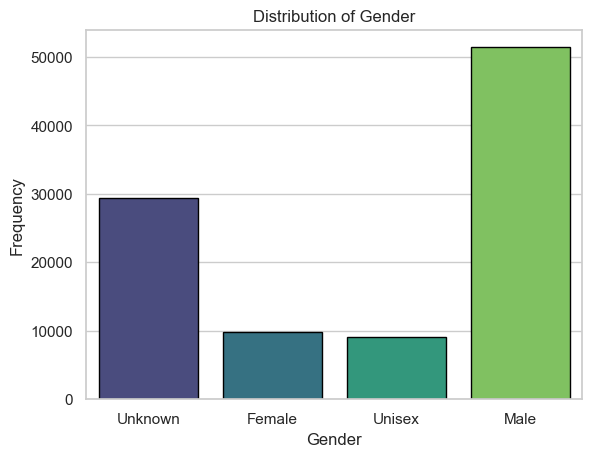

In [107]:
gender_distribution = Final_df['Gender']

sns.countplot(x=gender_distribution,edgecolor='black',palette='viridis')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()


#### Inference:
Data shows significant male skewness & 'Unknown' presence, but engagement within identified genders appears balanced.

### Hour 

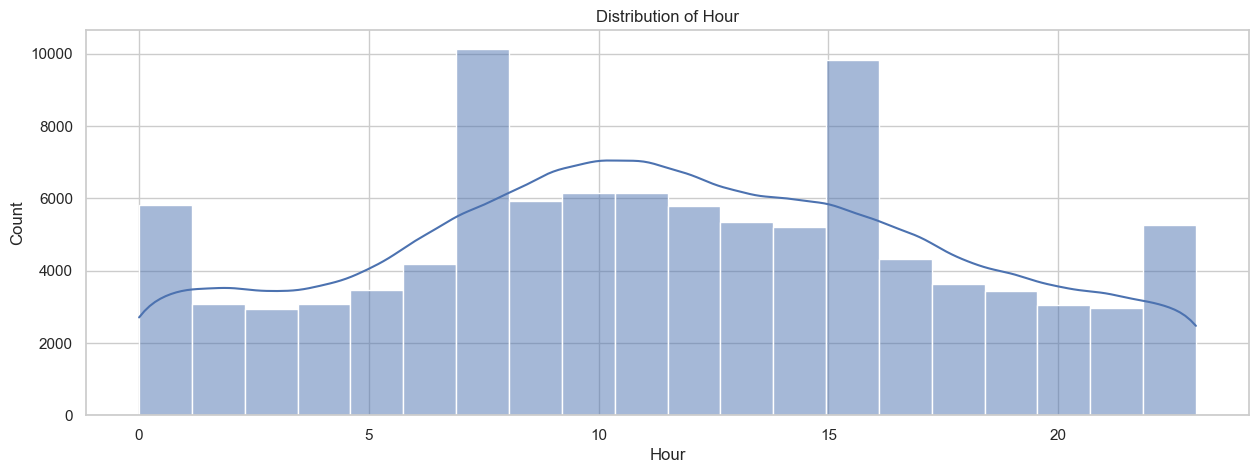

In [108]:
plt.figure(figsize=(15, 5))
sns.histplot(Final_df['Hour'], bins=20, kde=True)
plt.title(f'Distribution of Hour')

plt.show()

#### Inferences:
The distribution of Hour shows that there is a peak in the afternoon.
There is also a smaller peak in the evening.

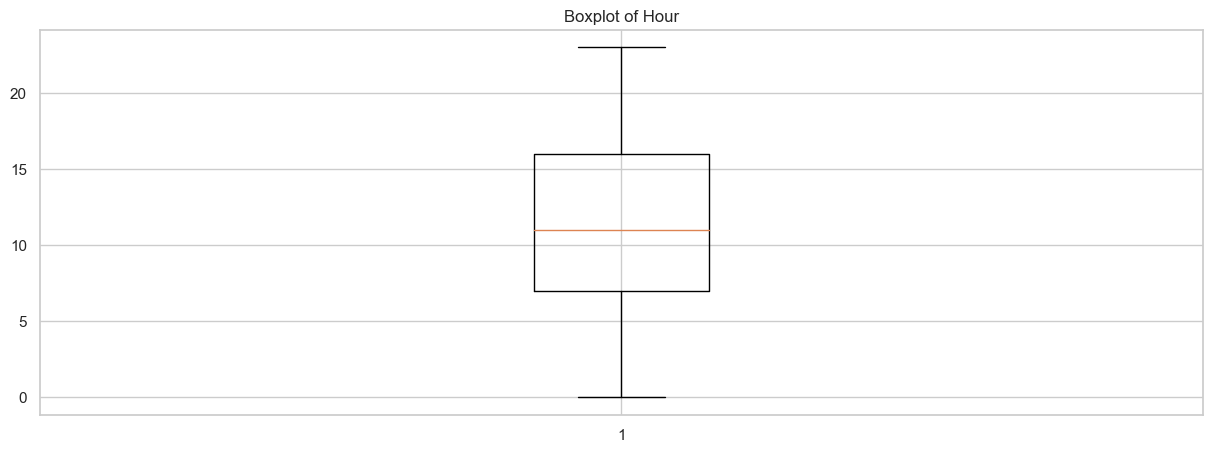

In [109]:
plt.figure(figsize=(15, 5))
plt.boxplot(Final_df['Hour'])
plt.title('Boxplot of Hour')

plt.show()

#### Inferences:
The boxplot suggests two peaks: a larger one in the afternoon and a smaller one in the evening. The distribution is bimodal, symmetric, and includes a few outliers.

### Day

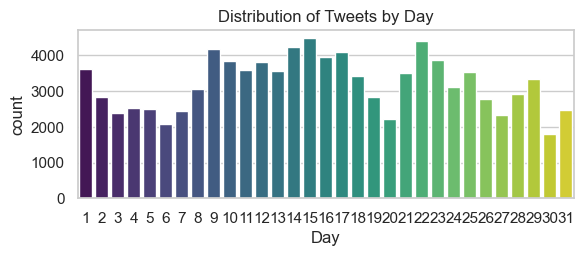

In [110]:
# Distribution of Tweets by Day
plt.subplot(2, 1, 1)
sns.countplot(x='Day', data=Final_df, palette='viridis')
plt.title('Distribution of Tweets by Day')
plt.show()

#### Inference:
Tweets peak on Sun-mornings & evenings, hinting at weekend joy & workday neutrality, with potential Sunday language shift.

### Weekday

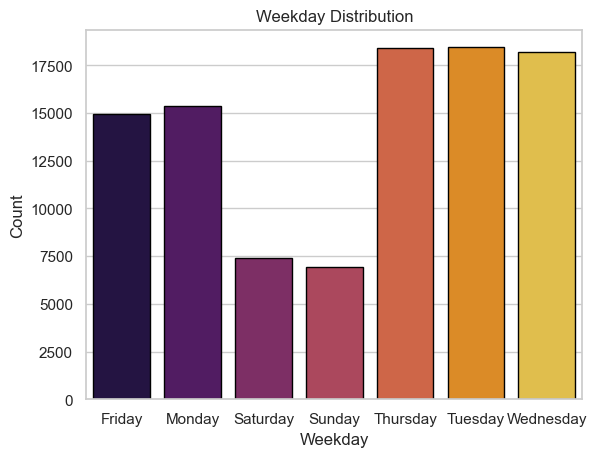

In [111]:
weekday_distribution = Final_df['Weekday']

sns.countplot(x=weekday_distribution, edgecolor='black',palette='inferno')
plt.title('Weekday Distribution')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.show()


#### Inference:
The distribution of Day shows that there is a slight peak in the number of users on Saturdays and Sundays.
This is likely because these are the weekends.
There is also a small peak in the number of users on Fridays.

### Klout

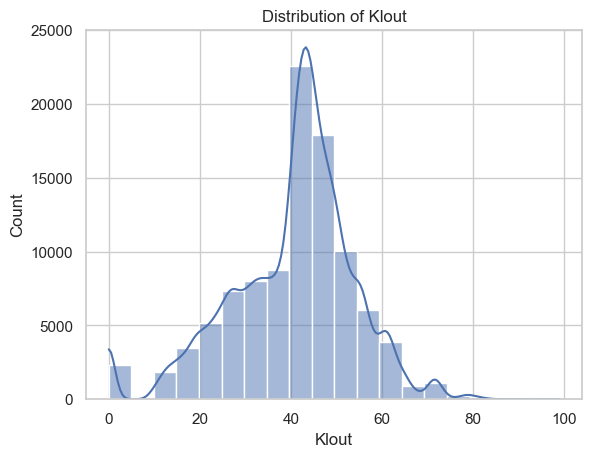

In [112]:
sns.histplot(Final_df['Klout'], bins=20, kde=True)
plt.title('Distribution of Klout')
plt.show()

#### Inferences:
  Klout scores are calculated is biased towards people who have a lot of followers and who are very active on social media.

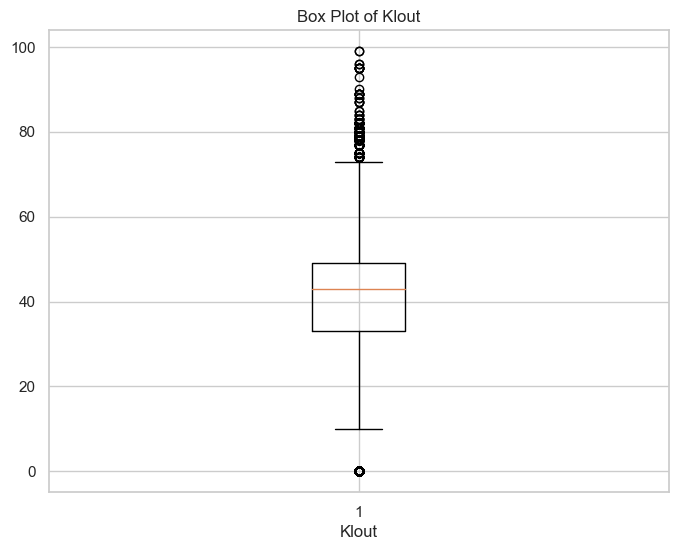

In [113]:
plt.figure(figsize=(8, 6))
plt.boxplot(Final_df['Klout'])
plt.title('Box Plot of Klout')
plt.xlabel('Klout')
plt.show()

#### Inferences:
Most people have a relatively low Klout score, but there are a few people with very high Klout scores.

### Klout Per Country

In [114]:
kpc = Final_df.groupby('Country')['Klout'].mean().reset_index()
kpc=kpc.sort_values(by='Klout', ascending=False)
kpc=kpc.iloc[:20,:]
kpc

,Country,Klout
14,Botswana,59.000000
98,Republic of the Congo,54.000000
72,Mali,52.500000
76,Mongolia,49.428571
28,Cyprus,47.625000
39,Georgia,46.500000
50,Iceland,46.071429
18,Burundi,46.000000
45,Guinea,45.590909
115,Syria,45.000000


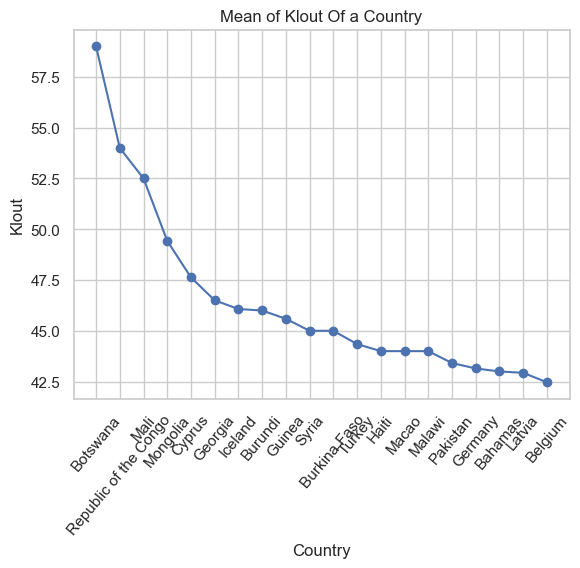

In [115]:
plt.plot(kpc['Country'], kpc['Klout'], marker='o')
plt.title('Mean of Klout Of a Country')
plt.xlabel('Country')
plt.ylabel('Klout')
plt.xticks(rotation=50)
plt.grid(True)
plt.show()

#### Inferences:
A significant portion of highly engaged tweets on Twitter, as measured by Klout scores, originate from African countries,with the notable exception of US.

### Language

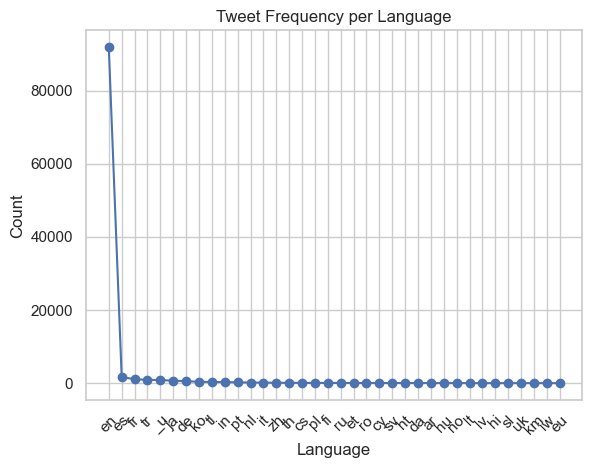

In [116]:
lang_counts = Final_df['Lang'].value_counts().reset_index()
lang_counts.columns = ['Language', 'Count']

plt.plot(lang_counts['Language'], lang_counts['Count'], marker='o')
plt.title('Tweet Frequency per Language')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()


#### Inference:
English reigns, yet a vibrant multilingual mix beckons: consider diverse engagement and non-English outreach.

## Coorelation Analysis

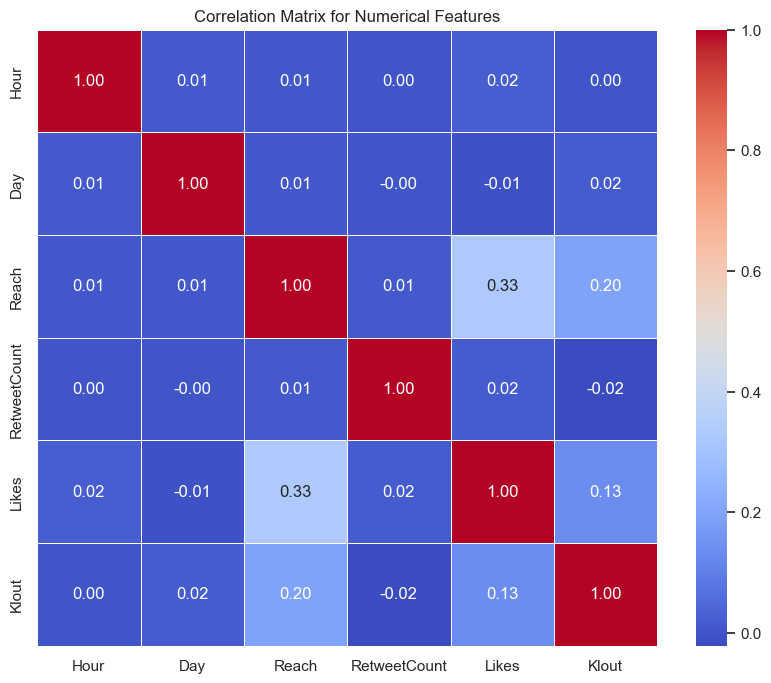

In [117]:
sns.set(style="whitegrid")

numerical_features = ['Hour', 'Day', 'Reach', 'RetweetCount', 'Likes', 'Klout']

correlation_matrix = Final_df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()

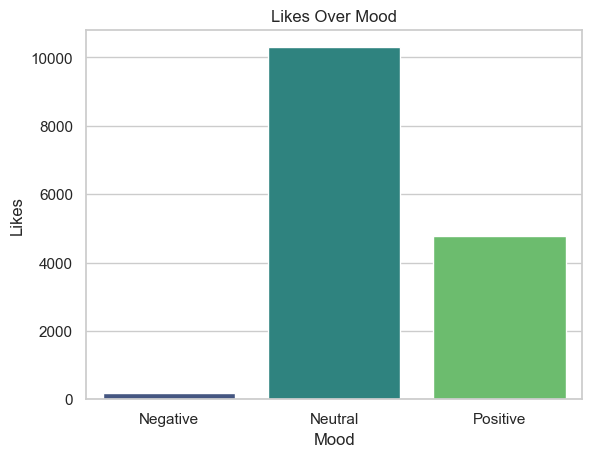

In [118]:
Final_df['Mood'] = Final_df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Neutral' if x == 0 else 'Negative'))

like_per_mood = Final_df.groupby('Mood')['Likes'].sum().reset_index()

sns.barplot(x='Mood', y='Likes', data=like_per_mood, palette='viridis')
plt.title('Likes Over Mood')
plt.xlabel('Mood')
plt.ylabel('Likes')
plt.show()

## Inference:
    Tweets with a neutral mood received more likes than negative tweets but less than positive tweets. This suggests that people are somewhat interested in neutral content, but it doesn't evoke the same strong emotions as positive or negative content.

#### Let's build a classification model by classifying our tweets in these three categories, namely:
## -Negative
## -Neutral
## -Positive

## Model Building:


#### Filter out non-English languages from the dataset.

In [119]:
Final_df = Final_df[Final_df['Lang']=='en']

#### Text processing

In [120]:
Final_df['text']=Final_df['text'].astype(str)
Final_df['text']=Final_df['text'].apply(lambda x:x.lower())

#### Removing the stop words [LIMIT-5000Characters]

In [121]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(max_features=5000,stop_words='english')

In [122]:
vectors= cv.fit_transform(Final_df['text']).toarray()

In [123]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

### Substituting stem

In [125]:
import nltk
from nltk.stem.porter import *
ps=PorterStemmer()

In [126]:
def stem(text):
  y=[]
  for i in text.split():
    y.append(ps.stem(i))
  return " ".join(y)

In [127]:
Final_df['text']= Final_df['text'].apply(stem)

In [144]:
Final_df.head()

,UserID,Gender,LocationID,City,State,StateCode,Country,TweetID,Hour,Day,...,IsReshare,Reach,RetweetCount,Likes,Klout,Sentiment,Lang,text,Mood,Label
0,tw-1267804344,Unknown,1,Elbasan,Elbasan,AL,Albania,tw-698155297102295041,7,12,...,True,339,127,0,44,0.0,en,"""rt @adrianrusso82: our innov lab is offici op...",Neutral,1
1,tw-4762500137,Female,10,Luanda,Luanda,AO,Angola,tw-690506796876824576,5,22,...,True,63,26,0,16,-2.0,en,rt @imoyse: microsoft slash azur price up to 1...,Negative,0
2,tw-4762500137,Female,10,Luanda,Luanda,AO,Angola,tw-698315842434555904,18,12,...,True,107,25,0,31,-2.0,en,rt @imoyse: hous of clouds: netflix abandon it...,Negative,0
12,tw-40031027,Unknown,14,Buenos Aires,Buenos Aires F.D.,AR,Argentina,tw-688021501577146369,8,15,...,False,177,0,0,33,0.0,en,@awscloud hey! when is ef go to becom availabl...,Neutral,1
13,tw-40031027,Unknown,14,Buenos Aires,Buenos Aires F.D.,AR,Argentina,tw-703289433685102593,11,26,...,True,210,28,0,34,0.0,en,rt @jeffbarr: how tokyu hand architect a cost-...,Neutral,1


In [129]:
from sklearn.preprocessing import LabelEncoder
le_model = LabelEncoder()
Final_df['Label'] = le_model.fit_transform(Final_df['Mood'])

## Training model:

#### Splitting the dataset into testing and training sets:

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Final_df['text'], Final_df['Label'],
                                                    test_size=0.2, random_state=42, stratify=Final_df['Label'])

In [131]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (73509,)
Shape of X_test:  (18378,)


## Model Training

In [132]:
clf = Pipeline([
    ('vectorizer_tri_grams', TfidfVectorizer()),
    ('random_forest', (RandomForestClassifier()))
])

In [133]:

clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_tri_grams', TfidfVectorizer()),
                ('random_forest', RandomForestClassifier())])

 The prevalence of neutral sentiment tweets far surpasses the relatively low count of negative tweets, making a meaningful comparison between the two challenging.

## Evaluation of the Model

In [134]:

from sklearn.metrics import accuracy_score, classification_report

In [135]:
# Get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)

In [136]:
print(accuracy_score(y_test, y_pred))

0.9123408423114594


In [137]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.52      0.68      1014
           1       0.89      0.99      0.94     12286
           2       0.96      0.80      0.87      5078

    accuracy                           0.91     18378
   macro avg       0.94      0.77      0.83     18378
weighted avg       0.92      0.91      0.91     18378



## Testing our model:

In [138]:
test_df=Final_df.iloc[:50000, :]

In [139]:
test=Final_df['text'][1000]

In [140]:
test_text = test_df['text'][1000]
print(f"{test} ===> {test_df['Label'][1000]}")

rt @awscloud: new the aw #bigdata blog: turn emr into a massiv s3 process engin with campanil https://blogs.aws.amazon.com/bigdata/post/tx1xu0oqazer3mi/turning-amazon-emr-into-a-massive-amazon-s3-processing-engine-with-campanile?adbsc=social_blogs_20160129_57773736&adbid=693195696921403394&adbpl=tw&adbpr=66780587 https:// ===> 1


In [141]:
test = clf.predict([test_text])

In [142]:
classes = ['Negative', 'Neutral', 'Positive']

print(f"True Label: {test_df['Mood'][1000]}")
print(f'Predict Label: {classes[test[0]]}')

True Label: Neutral
Predict Label: Neutral


### Conclusion:
    We have analysed the sentiment of the tweet with the accuracy :
    91% .